<a href="https://colab.research.google.com/github/Clinton1029/Titanic_Survival_Prediction_ML/blob/main/Titanic_Survival_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🚢 Titanic Survival Prediction - ML Project
#
# **Author**: [Clinton Yade]  
# **Date**: [10/22/2025]  
# **Version**: 1.0  
#
# ![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)
#
#  📋 Table of Contents
#
# 1. [Installation & Setup](#1-installation--setup)
# 2. [Data Loading & Initial Exploration](#2-data-loading--initial-exploration)
# 3. [Data Cleaning & Preprocessing](#3-data-cleaning--preprocessing)
# 4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
# 5. [Feature Engineering](#5-feature-engineering)
# 6. [Data Preprocessing for ML](#6-data-preprocessing-for-ml)
# 7. [Machine Learning Model Training](#7-machine-learning-model-training)
# 8. [Model Evaluation & Comparison](#8-model-evaluation--comparison)
# 9. [Best Model Analysis](#9-best-model-analysis)
# 10. [Model Interpretation & Insights](#10-model-interpretation--insights)
# 11. [Model Deployment & Final Results](#11-model-deployment--final-results)
# 12. [Sample Predictions & Testing](#12-sample-predictions--testing)
# 13. [Project Summary & Conclusions](#13-project-summary--conclusions)



# 1. Installation & Setup

# Import libraries




In [11]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn plotly scikit-learn



In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import io

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

# Additional utilities
import warnings
warnings.filterwarnings('ignore')
import pickle

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# 2. Data Loading & Initial Exploration


In [12]:
# Load datasets
import requests
import io

# URL for the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

# Download the dataset
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes

# Load the dataset into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))


# Display basic information
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of passengers: {len(df)}")
print(f"Features: {list(df.columns)}")

# Display first few rows
print("👀 FIRST 5 ROWS:")
display(df.head())

# Dataset information
print("📋 DATASET INFO:")
print("=" * 40)
df.info()

# Statistical summary
print("📈 STATISTICAL SUMMARY:")
print("=" * 40)
display(df.describe())

📊 DATASET OVERVIEW
Dataset shape: (887, 8)
Number of passengers: 887
Features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
👀 FIRST 5 ROWS:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
📈 STATISTICAL SUMMARY:


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# 3. Data Cleaning & Preprocessing


🔍 MISSING VALUES ANALYSIS:


,Missing Count,Missing Percentage


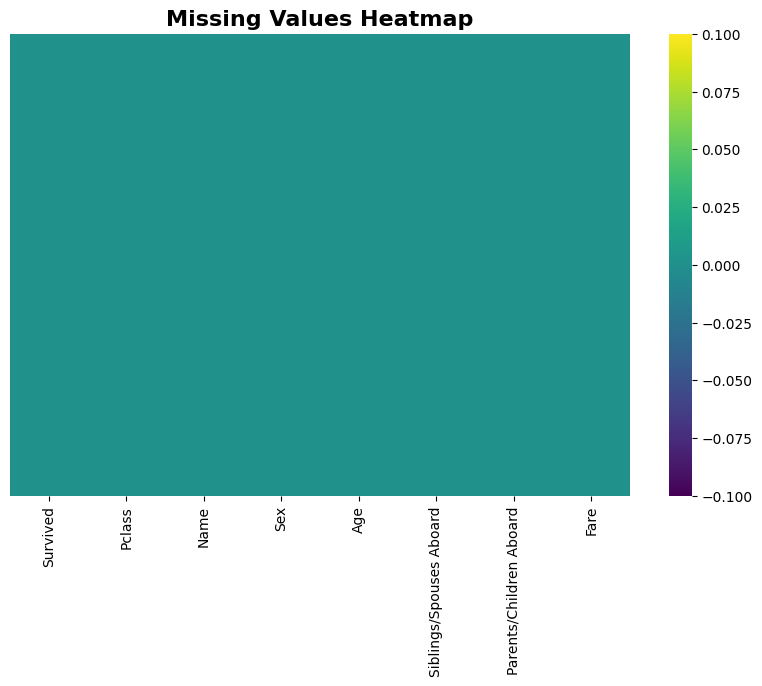

🛠️ HANDLING MISSING VALUES:
Current columns: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
✅ Missing values handled successfully!
Remaining missing values: 0

📊 CLEANED DATASET INFO:
Shape: (887, 8)
Columns: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'sibsp', 'parch', 'Fare']


In [14]:
# Check for missing values
print("🔍 MISSING VALUES ANALYSIS:")
print("=" * 40)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

display(missing_df)

# %%
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.show()

# %%
# Handle missing values
print("🛠️ HANDLING MISSING VALUES:")
print("=" * 40)

# Create a copy for processing
df_clean = df.copy()

# Check column names and adjust preprocessing accordingly
print("Current columns:", list(df_clean.columns))

# The Stanford dataset has different column names - let's standardize them
# Map Stanford column names to more standard names
column_mapping = {
    'Siblings/Spouses Aboard': 'sibsp',
    'Parents/Children Aboard': 'parch'
}
df_clean.rename(columns=column_mapping, inplace=True)

# Handle missing values based on available columns
if 'Age' in df_clean.columns:
    # Age - Impute with median
    df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

# Check if we have any other columns with missing values and handle them
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print("✅ Missing values handled successfully!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

# Display cleaned data info
print("\n📊 CLEANED DATASET INFO:")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")


# 4. Exploratory Data Analysis (EDA)


🎯 TARGET VARIABLE DISTRIBUTION (SURVIVED):


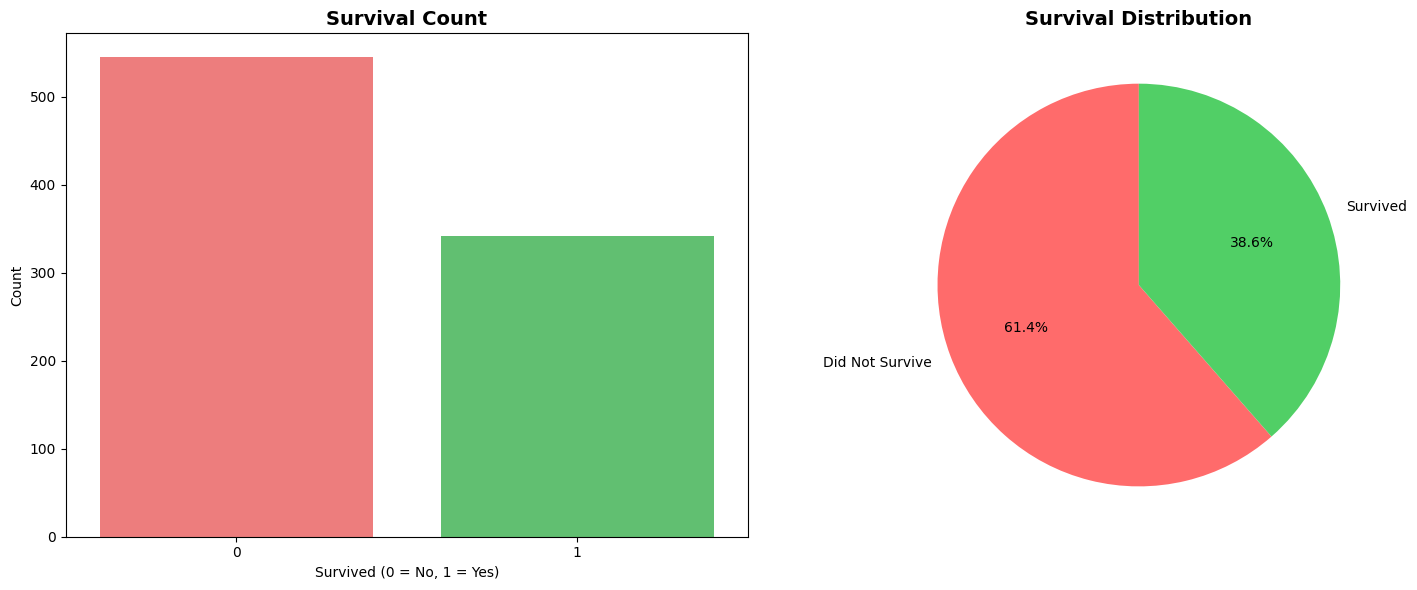

Survival Rate: 38.56%
Non-Survival Rate: 61.44%
👥 DEMOGRAPHIC ANALYSIS:


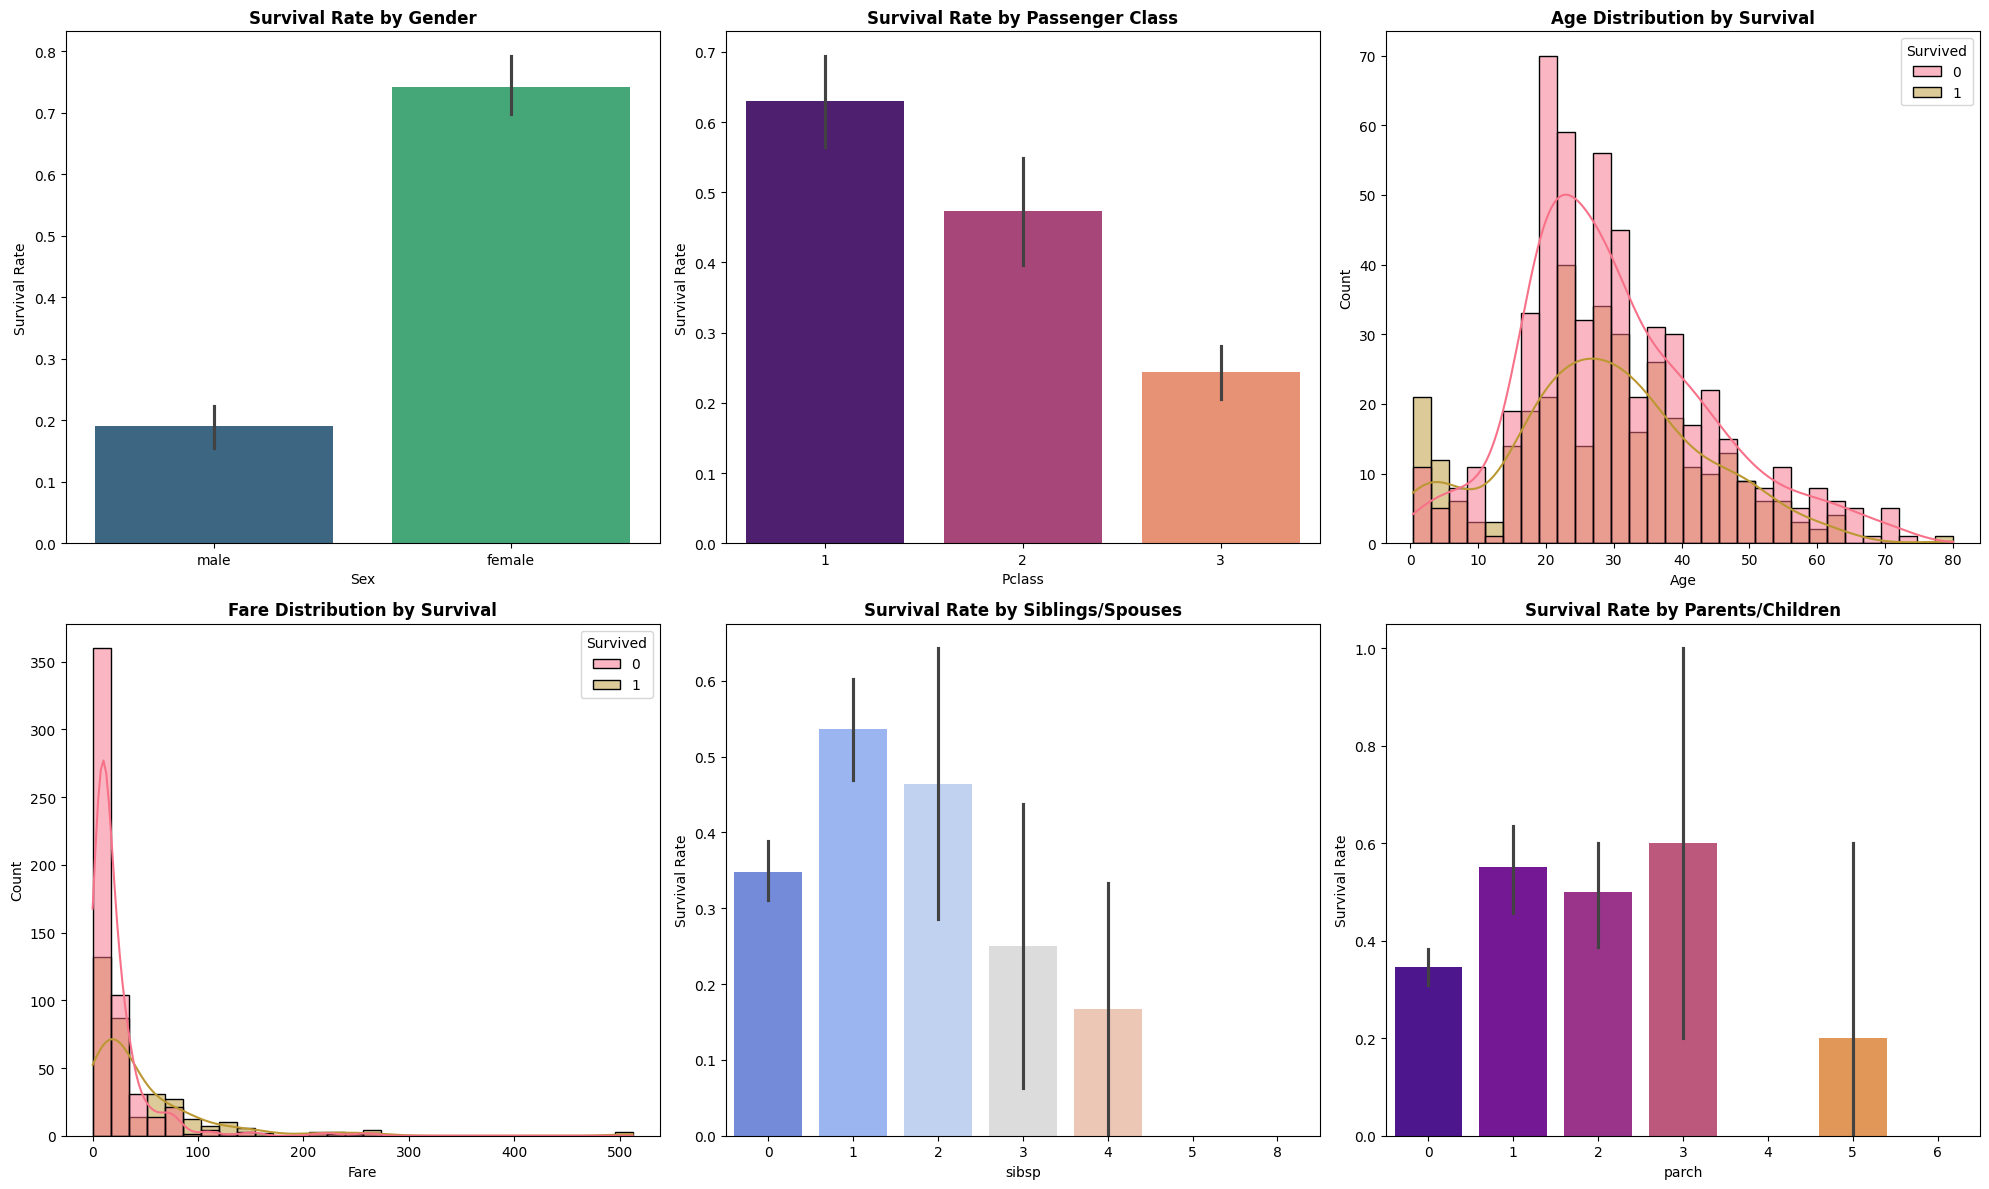

📈 CORRELATION ANALYSIS:


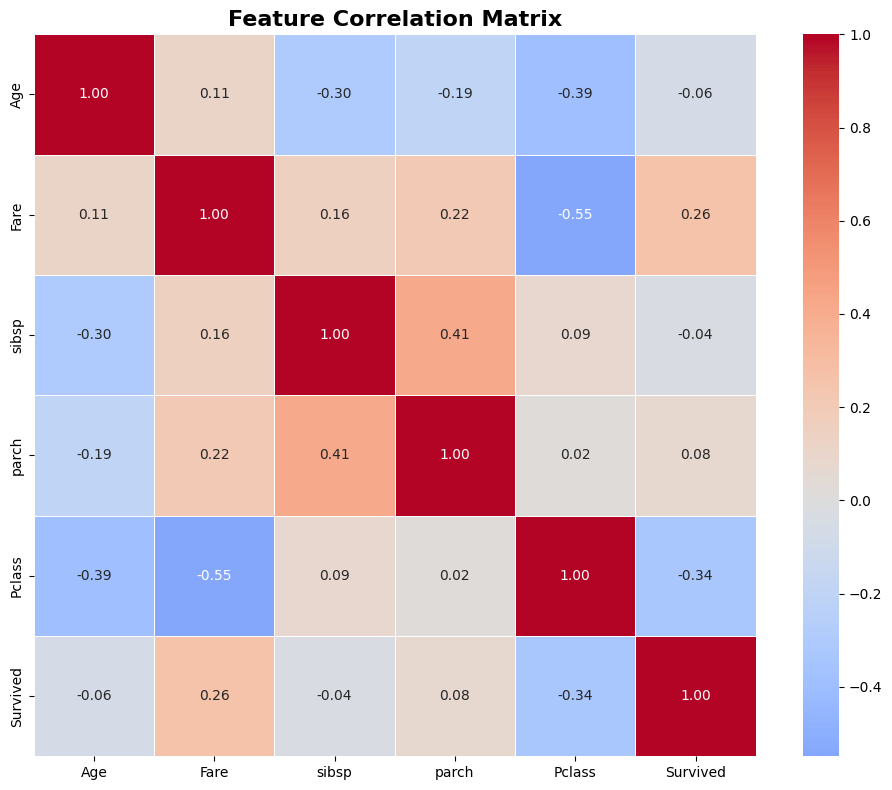

In [15]:
# Target variable distribution
print("🎯 TARGET VARIABLE DISTRIBUTION (SURVIVED):")
print("=" * 50)

survival_counts = df_clean['Survived'].value_counts()
survival_percent = df_clean['Survived'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df_clean, x='Survived', ax=ax1, palette=['#ff6b6b', '#51cf66'])
ax1.set_title('Survival Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Survived (0 = No, 1 = Yes)')
ax1.set_ylabel('Count')

# Pie chart
colors = ['#ff6b6b', '#51cf66']
ax2.pie(survival_counts, labels=['Did Not Survive', 'Survived'],
        autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Survival Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Survival Rate: {survival_percent[1]:.2f}%")
print(f"Non-Survival Rate: {survival_percent[0]:.2f}%")

# %%
# Demographic Analysis - Adjusted for Stanford dataset columns
print("👥 DEMOGRAPHIC ANALYSIS:")
print("=" * 40)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Survival by Gender
sns.barplot(data=df_clean, x='Sex', y='Survived', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Survival Rate by Gender', fontweight='bold')
axes[0,0].set_ylabel('Survival Rate')

# 2. Survival by Passenger Class
sns.barplot(data=df_clean, x='Pclass', y='Survived', ax=axes[0,1], palette='magma')
axes[0,1].set_title('Survival Rate by Passenger Class', fontweight='bold')
axes[0,1].set_ylabel('Survival Rate')

# 3. Age Distribution by Survival
sns.histplot(data=df_clean, x='Age', hue='Survived', bins=30, ax=axes[0,2], kde=True)
axes[0,2].set_title('Age Distribution by Survival', fontweight='bold')
axes[0,2].set_xlabel('Age')

# 4. Fare Distribution by Survival
sns.histplot(data=df_clean, x='Fare', hue='Survived', bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Fare Distribution by Survival', fontweight='bold')
axes[1,0].set_xlabel('Fare')

# 5. Survival by SibSp
sns.barplot(data=df_clean, x='sibsp', y='Survived', ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title('Survival Rate by Siblings/Spouses', fontweight='bold')
axes[1,1].set_ylabel('Survival Rate')

# 6. Survival by Parch
sns.barplot(data=df_clean, x='parch', y='Survived', ax=axes[1,2], palette='plasma')
axes[1,2].set_title('Survival Rate by Parents/Children', fontweight='bold')
axes[1,2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# %%
# Correlation Analysis
print("📈 CORRELATION ANALYSIS:")
print("=" * 40)

# Select numerical features for correlation
numerical_features = ['Age', 'Fare', 'sibsp', 'parch', 'Pclass', 'Survived']
correlation_matrix = df_clean[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 5. Feature Engineering


In [16]:
print("⚙️ ADVANCED FEATURE ENGINEERING:")
print("=" * 50)

# Create a copy for feature engineering
df_features = df_clean.copy()

# 1. Extract Title from Name
df_features['Title'] = df_features['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Rare', 'Countess': 'Rare',
    'Capt': 'Rare', 'Sir': 'Rare', 'Don': 'Rare', 'Jonkheer': 'Rare'
}
df_features['Title'] = df_features['Title'].map(title_mapping)
df_features['Title'].fillna('Rare', inplace=True)

# 2. Family Features
df_features['FamilySize'] = df_features['sibsp'] + df_features['parch'] + 1
df_features['IsAlone'] = (df_features['FamilySize'] == 1).astype(int)

# 3. Age Groups
df_features['AgeGroup'] = pd.cut(df_features['Age'],
                                bins=[0, 12, 18, 35, 60, 100],
                                labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# 4. Fare Categories
df_features['FareGroup'] = pd.qcut(df_features['Fare'], 4,
                                  labels=['Low', 'Medium', 'High', 'Very High'])

print("✅ Engineered Features Created:")
print(f"  - Title: {df_features['Title'].unique()}")
print(f"  - Family Size: Range {df_features['FamilySize'].min()} to {df_features['FamilySize'].max()}")
print(f"  - Age Groups: {df_features['AgeGroup'].unique()}")
print(f"  - Fare Groups: {df_features['FareGroup'].unique()}")

# Display new features
print("\n👀 SAMPLE OF ENGINEERED FEATURES:")
display(df_features[['Name', 'Title', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']].head(8))


⚙️ ADVANCED FEATURE ENGINEERING:
✅ Engineered Features Created:
  - Title: ['Rare']
  - Family Size: Range 1 to 11
  - Age Groups: ['Adult', 'Middle', 'Child', 'Teen', 'Senior']
Categories (5, object): ['Child' < 'Teen' < 'Adult' < 'Middle' < 'Senior']
  - Fare Groups: ['Low', 'Very High', 'Medium', 'High']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

👀 SAMPLE OF ENGINEERED FEATURES:


,Name,Title,FamilySize,IsAlone,AgeGroup,FareGroup
0,Mr. Owen Harris Braund,Rare,2,0,Adult,Low
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,Rare,2,0,Middle,Very High
2,Miss. Laina Heikkinen,Rare,1,1,Adult,Low
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,Rare,2,0,Adult,Very High
4,Mr. William Henry Allen,Rare,1,1,Adult,Medium
5,Mr. James Moran,Rare,1,1,Adult,Medium
6,Mr. Timothy J McCarthy,Rare,1,1,Middle,Very High
7,Master. Gosta Leonard Palsson,Rare,5,0,Child,High


# 6. Data Preprocessing for ML


In [17]:
print("🔧 DATA PREPROCESSING FOR MACHINE LEARNING:")
print("=" * 55)

# Select features for modeling - using Stanford dataset columns
feature_columns = [
    'Pclass', 'Sex', 'Age', 'sibsp', 'parch', 'Fare', 'Title', 'FamilySize', 'IsAlone'
]

# Target variable
target = 'Survived'

# Prepare feature matrix and target vector
X = df_features[feature_columns].copy()
y = df_features[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# %%
# Handle categorical variables
print("📊 CATEGORICAL VARIABLE ENCODING:")
print("=" * 40)

# One-hot encoding for nominal variables
categorical_cols = ['Sex', 'Title']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape after encoding: {X_encoded.shape}")
print(f"New features: {list(X_encoded.columns)}")

# %%
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 DATA SPLITTING RESULTS:")
print("=" * 35)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# %%
# Feature Scaling
print("⚖️ FEATURE SCALING:")
print("=" * 25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")


🔧 DATA PREPROCESSING FOR MACHINE LEARNING:
Feature matrix shape: (887, 9)
Target vector shape: (887,)
📊 CATEGORICAL VARIABLE ENCODING:
Shape after encoding: (887, 8)
New features: ['Pclass', 'Age', 'sibsp', 'parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male']
📊 DATA SPLITTING RESULTS:
Training set: 709 samples
Testing set: 178 samples
Features: 8
⚖️ FEATURE SCALING:
✅ Features scaled successfully!


# 7. Machine Learning Model Training


In [18]:
print("🤖 MACHINE LEARNING MODEL TRAINING:")
print("=" * 45)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
}

# Train and tune models
trained_models = {}
cv_results = {}

print("🚀 TRAINING MODELS WITH CROSS-VALIDATION...")
print("=" * 50)

for name, model in models.items():
    print(f"\n🔧 Training {name}...")

    # Use scaled data for certain models
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
    else:
        X_train_used = X_train
        X_test_used = X_test

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(
        model, param_grids[name],
        cv=5, scoring='accuracy', n_jobs=-1, verbose=0
    )

    grid_search.fit(X_train_used, y_train)

    # Store results
    trained_models[name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test_used)
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test_used)[:, 1] if hasattr(grid_search.best_estimator_, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    trained_models[name].update({
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1,
        'test_auc': auc
    })

    print(f"✅ {name} - Best CV Accuracy: {grid_search.best_score_:.4f}")
    print(f"   Test Accuracy: {accuracy:.4f}")
    print(f"   Best Parameters: {grid_search.best_params_}")


🤖 MACHINE LEARNING MODEL TRAINING:
🚀 TRAINING MODELS WITH CROSS-VALIDATION...

🔧 Training Logistic Regression...
✅ Logistic Regression - Best CV Accuracy: 0.8054
   Test Accuracy: 0.7978
   Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}

🔧 Training Random Forest...
✅ Random Forest - Best CV Accuracy: 0.8392
   Test Accuracy: 0.7697
   Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

🔧 Training Gradient Boosting...
✅ Gradient Boosting - Best CV Accuracy: 0.8350
   Test Accuracy: 0.7921
   Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

🔧 Training Support Vector Machine...
✅ Support Vector Machine - Best CV Accuracy: 0.8307
   Test Accuracy: 0.7978
   Best Parameters: {'C': 10, 'kernel': 'rbf'}

🔧 Training K-Nearest Neighbors...
✅ K-Nearest Neighbors - Best CV Accuracy: 0.8096
   Test Accuracy: 0.7753
   Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}

🔧 Training Decision Tree...
✅ Decision Tree - Best CV Accuracy: 

# 8. Model Evaluation & Comparison


📊 COMPREHENSIVE MODEL EVALUATION:

🏆 MODEL PERFORMANCE COMPARISON:


,Model,CV Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test AUC,Best Parameters
5,Decision Tree,0.806793,0.803371,0.803571,0.652174,0.720000,0.846629,"{'max_depth': 5, 'min_samples_split': 10}"
0,Logistic Regression,0.805374,0.797753,0.770492,0.681159,0.723077,0.855937,"{'C': 0.1, 'solver': 'lbfgs'}"
3,Support Vector Machine,0.830746,0.797753,0.800000,0.637681,0.709677,0.805146,"{'C': 10, 'kernel': 'rbf'}"
2,Gradient Boosting,0.835011,0.792135,0.750000,0.695652,0.721805,0.816780,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}"
4,K-Nearest Neighbors,0.809599,0.775281,0.704225,0.724638,0.714286,0.805810,"{'n_neighbors': 7, 'weights': 'distance'}"
1,Random Forest,0.839217,0.769663,0.700000,0.710145,0.705036,0.828946,"{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}"


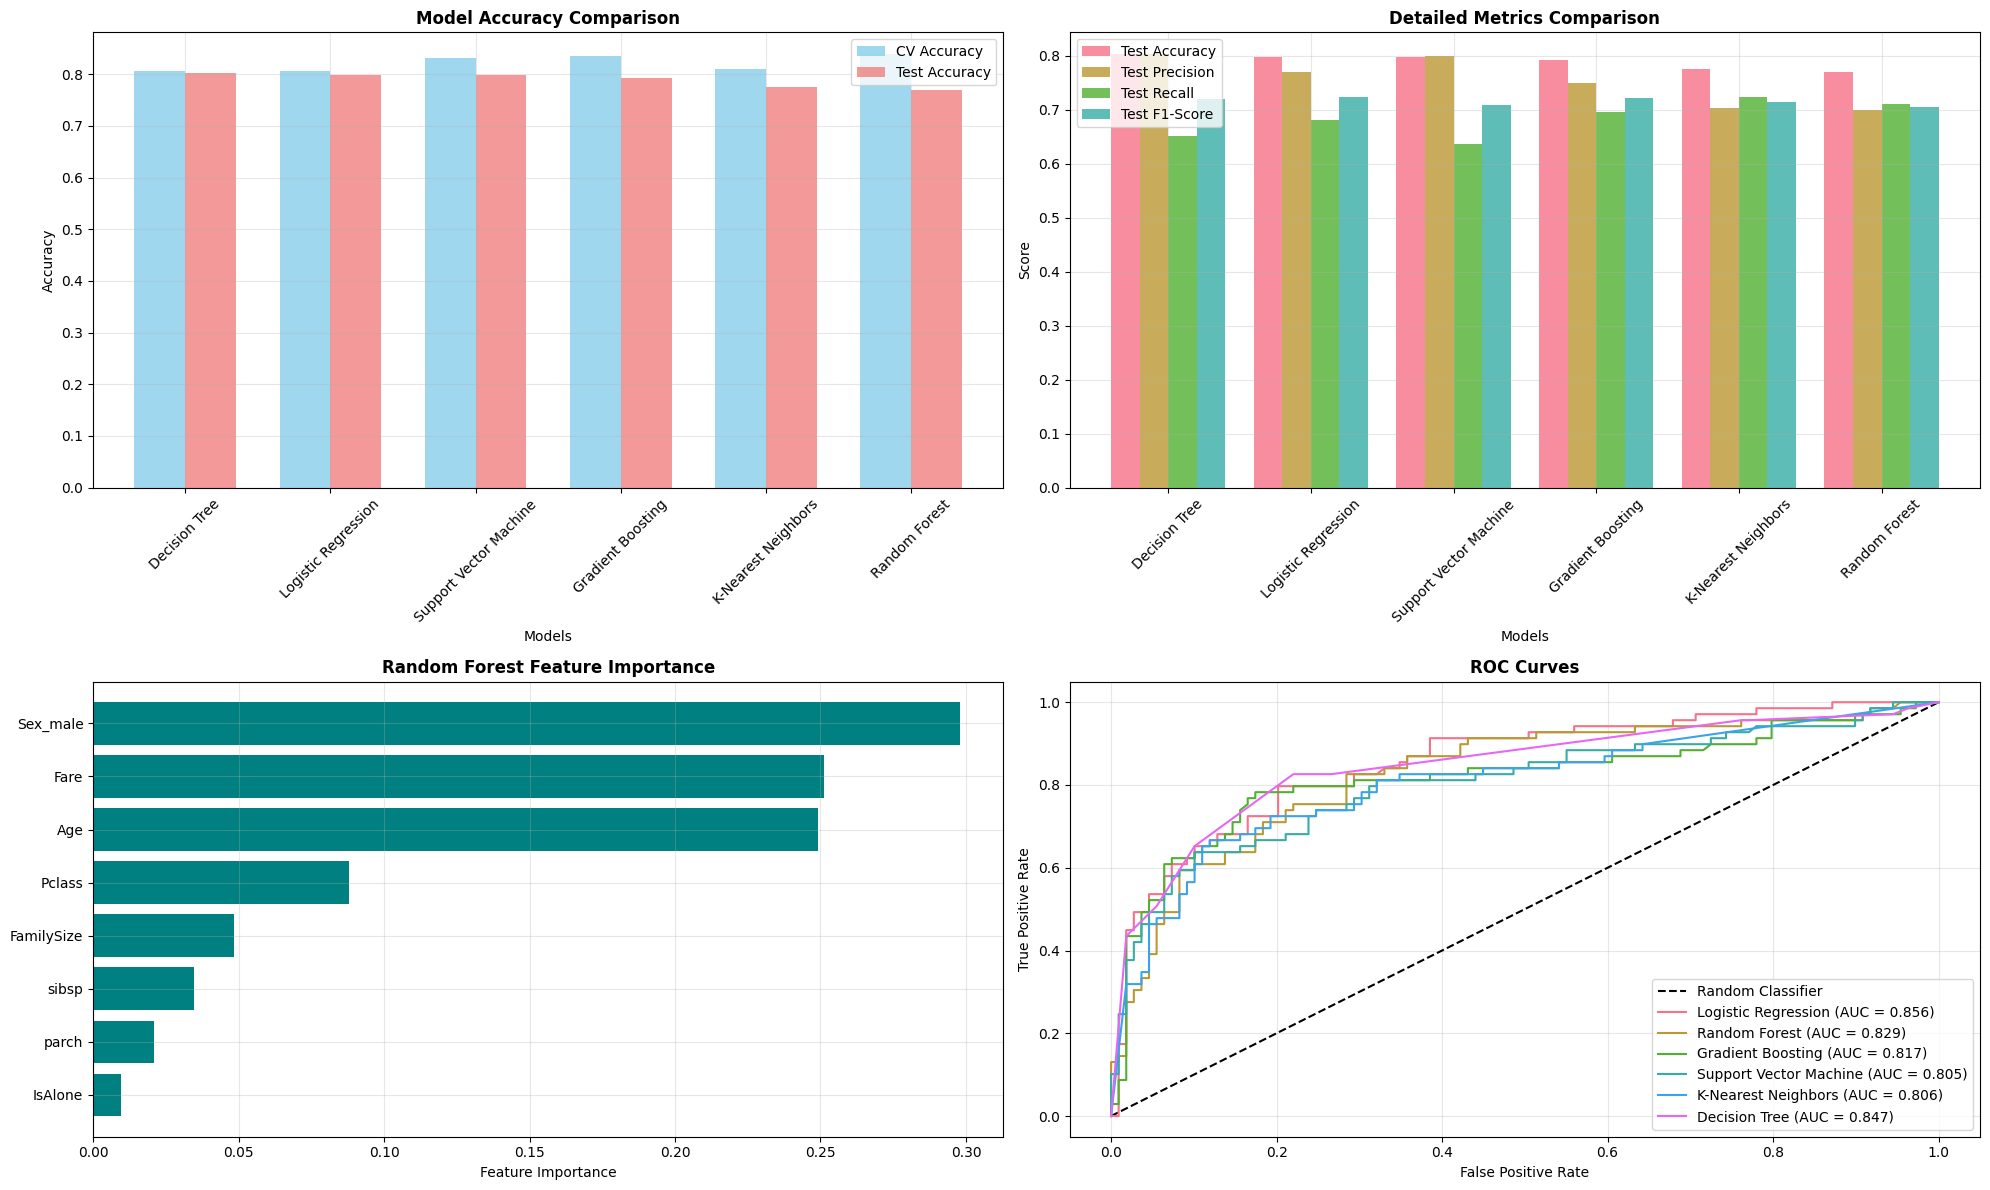

In [20]:
print("📊 COMPREHENSIVE MODEL EVALUATION:")
print("=" * 45)

# Create results dataframe
results_list = []
for name, metrics in trained_models.items():
    results_list.append({
        'Model': name,
        'CV Score': metrics['best_score'],
        'Test Accuracy': metrics['test_accuracy'],
        'Test Precision': metrics['test_precision'],
        'Test Recall': metrics['test_recall'],
        'Test F1-Score': metrics['test_f1'],
        'Test AUC': metrics['test_auc'] if metrics['test_auc'] is not None else 0,
        'Best Parameters': str(metrics['best_params'])
    })

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

# Display results
print("\n🏆 MODEL PERFORMANCE COMPARISON:")
print("=" * 50)
display(results_df.style.background_gradient(cmap='Blues', subset=['Test Accuracy', 'Test F1-Score']))

# %%
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Accuracy Comparison
models_names = results_df['Model']
test_accuracy = results_df['Test Accuracy']
cv_accuracy = results_df['CV Score']

x = np.arange(len(models_names))
width = 0.35

axes[0,0].bar(x - width/2, cv_accuracy, width, label='CV Accuracy', alpha=0.8, color='skyblue')
axes[0,0].bar(x + width/2, test_accuracy, width, label='Test Accuracy', alpha=0.8, color='lightcoral')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(models_names, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Metrics Comparison
metrics_to_plot = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
metrics_data = results_df[metrics_to_plot].values.T

x = np.arange(len(models_names))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    axes[0,1].bar(x + i*width, metrics_data[i], width, label=metric, alpha=0.8)

axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('Score')
axes[0,1].set_title('Detailed Metrics Comparison', fontweight='bold')
axes[0,1].set_xticks(x + width*1.5)
axes[0,1].set_xticklabels(models_names, rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Feature Importance (for Random Forest)
best_rf_model = trained_models['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1,0].barh(feature_importance['feature'], feature_importance['importance'], color='teal')
axes[1,0].set_xlabel('Feature Importance')
axes[1,0].set_title('Random Forest Feature Importance', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. ROC Curves
axes[1,1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
for name, metrics in trained_models.items():
    if metrics['test_auc'] is not None:
        model = metrics['model']
        if hasattr(model, "predict_proba"):
            if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
                X_used = X_test_scaled
            else:
                X_used = X_test

            y_pred_proba = model.predict_proba(X_used)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc_score = roc_auc_score(y_test, y_pred_proba)
            axes[1,1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ROC Curves', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
